In [387]:
import sys
import pandas 
%matplotlib inline
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
#from IPython.display import display HTML

##import scipy.stats





# Merge + Clean of Performance and Master Datasets 
#2 into 1



In [388]:
## OnTime Perfromance Dataset
performance = pandas.read_csv("On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_1.csv",index_col=None, na_values=['NA'],sep=',',low_memory=False)
performance.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2019,1,1,4,5,2019-01-04,OO,20304,OO,N945SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,4,5,2019-01-04,OO,20304,OO,N932SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,4,5,2019-01-04,OO,20304,OO,N932SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,4,5,2019-01-04,OO,20304,OO,N916SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,4,5,2019-01-04,OO,20304,OO,N107SY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
## Master Resgistry Dataset
master = pandas.read_csv("MASTER.csv",index_col=None, na_values=['NA'],sep=',',low_memory=False)
master.head()

,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 34
0,1,1071,3980115,54556,1988,5,FEDERAL AVIATION ADMINISTRATION ...,6500 S MACARTHUR BLVD,HGR 9E BLDG 10 ROOM 303,OKLAHOMA CITY,...,...,...,...,...,20191130,524101,,,A00001,NaN
1,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,...,...,...,...,20200430,600060,,,A004B3,NaN
2,10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,...,...,...,...,...,20220228,432072,,,A00726,NaN
3,10002,79-030,8930105,41525,1979,3,ENGLISH AIR SERVICE ...,3409 CORSAIR CIR,,SANTA MARIA,...,...,...,...,...,20201031,831480,,,A00727,NaN
4,10003,1,056336T,,,1,CAMPBELL CHARLES N ...,604 CORDOVA CT,,SALISBURY,...,...,...,...,...,20210331,1173853,,,A00728,NaN


In [390]:
## Extracting the N Number from the master data 

##setting the N number for intersection
nn_number = 'N' + master["N-NUMBER"].astype(str)
##print(nn_number)
n_set = set(nn_number)
print(len(n_set))


292717


In [391]:
##counter = Counter(performance["Tail_Number"])
##print(counter)

tail_numbers= performance["Tail_Number"]
###print (tail_numbers)

all_n = []
for i in tail_numbers:
    if str(i)[0] != "N":
        all_n.append("N"+str(i))
    else:
        all_n.append(str(i))
print(len(all_n))

new_tail = set(all_n)
print(len(new_tail))

583985
5447


In [7]:
## matching the tail numnber and the N number that both being with N 
## in the master in the file 
## 5408 overlaps 
overlap =n_set.intersection(new_tail)
print(len(overlap))

5408


In [392]:
master["Tail_Number"] = 'N' + master["N-NUMBER"].astype(str)

##master["Tail_Number"] = overlap
##print(master["Tail_Number"])
master.head()


,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 34,Tail_Number
0,1,1071,3980115,54556,1988,5,FEDERAL AVIATION ADMINISTRATION ...,6500 S MACARTHUR BLVD,HGR 9E BLDG 10 ROOM 303,OKLAHOMA CITY,...,...,...,...,20191130,524101,,,A00001,NaN,N1
1,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,...,...,...,20200430,600060,,,A004B3,NaN,N100
2,10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,...,...,...,...,20220228,432072,,,A00726,NaN,N10001
3,10002,79-030,8930105,41525,1979,3,ENGLISH AIR SERVICE ...,3409 CORSAIR CIR,,SANTA MARIA,...,...,...,...,20201031,831480,,,A00727,NaN,N10002
4,10003,1,056336T,,,1,CAMPBELL CHARLES N ...,604 CORDOVA CT,,SALISBURY,...,...,...,...,20210331,1173853,,,A00728,NaN,N10003


In [393]:
##merged two datasets together to create new dataset
performance_master = pandas.merge(performance[["Tail_Number","DayOfWeek","Year","AirTime","ArrDelayMinutes","DepDelayMinutes","OriginCityName","DestCityName","ArrDel15", "DepDel15"]],master[["MFR MDL CODE","Tail_Number","YEAR MFR"]], on ="Tail_Number")
pandas.options.display.max_rows = 50
performance_master.head()

,Tail_Number,DayOfWeek,Year,AirTime,ArrDelayMinutes,DepDelayMinutes,OriginCityName,DestCityName,ArrDel15,DepDel15,MFR MDL CODE,YEAR MFR
0,N945SW,5,2019,37.0,0.0,0.0,"San Luis Obispo, CA","San Francisco, CA",0.0,0.0,1390008,2003
1,N945SW,5,2019,72.0,3.0,0.0,"San Francisco, CA","Boise, ID",0.0,0.0,1390008,2003
2,N945SW,5,2019,45.0,0.0,0.0,"Durango, CO","Denver, CO",0.0,0.0,1390008,2003
3,N945SW,6,2019,135.0,40.0,0.0,"Boise, ID","Los Angeles, CA",1.0,0.0,1390008,2003
4,N945SW,6,2019,53.0,24.0,23.0,"Los Angeles, CA","Monterey, CA",1.0,1.0,1390008,2003


# Merge + Clean Performance_Master and ACFTREF dataset

In [10]:
aircraft = pandas.read_csv("ACFTREF.csv",index_col=None, na_values=['NA'],sep=',',low_memory=False)
aircraft.head()

,CODE,MFR,MODEL,TYPE-ACFT,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED,Unnamed: 11
0,0020901,AAR AIRLIFT GROUP INC,UH-60A,6,3,1,0,2,15,CLASS 3,0,NaN
1,0030109,EXLINE ACE-C,ACE-C,4,1,1,1,1,1,CLASS 1,82,NaN
2,003010D,DELEBAUGH,P,4,1,1,1,1,1,CLASS 1,82,NaN
3,003010H,DAL PORTO,BABY ACE D,4,1,1,1,1,1,CLASS 1,82,NaN
4,003010P,DUNN,BABY ACE,4,1,1,1,1,1,CLASS 1,82,NaN


In [394]:
##setting the MFR MDL CODE
## there is mulitple perofrmance master repeats
code_1=performance_master["MFR MDL CODE"]
count = Counter(code_1).most_common(10)
print(count)
##print(len(code_1))
##x = set(code_1)
##print(len(x))

[('1384404', 56318), ('1390008', 40615), ('1390016', 37865), ('3260415', 35033), ('1390015', 25651), ('13844CB', 24716), ('3940032', 19467), ('3940004', 18754), ('3260212', 17227), ('1383700', 16917)]


In [395]:
x = set(code_1)
print(x)

{'3260302', '3940018', '05605ZK', '5870219', '1384541', '3023690', '3930335', '1384965', '1384991', '3940070', '3260403', '1384540', '3260410', '1388002', '13844ZQ', '3940010', '1385232', '1385278', '13844JA', '1385270', '1384527', '3940325', '1385213', '1385205', '1384418', '3940000', '7320001', '13848CE', '1384908', '1385225', '1385133', '1384413', '3980050', '1385200', '0390309', '056115K', '1384957', '3940005', '1385101', '2130004', '3023688', '13844CV', '3022082', '13845AA', '2730009', '1384907', '13848A1', '3940009', '1384973', '138447E', '1384526', '7103218', '13844CF', '1384930', '13844NA', '3930316', '056559W', '2072703', '326041A', '13844CS', '7090453', '2990004', '3930402', '1384931', '138488H', '13844LA', '13844CN', '2130001', '06101ZK', '13844FH', '1385609', '3940001', '13844FZ', '2990002', '3260121', '13844CB', '1384502', '1384404', '1384972', '3023681', '13844C3', '3260415', '3940320', '1385219', '13844CH', '0390307', '326040B', '2072738', '3930317', '3970109', '3930370'

In [396]:
# setting the CODE in ACFTREF ## one code for all of them 
code_2 = aircraft["CODE"]
##print(code_2)
counter = Counter(code_2).most_common()
y = set(code_2)
print(len(y))

85776


In [397]:
## OVerlapping of ACTREF code and Model 
## as a result all of them overlap with some number 
overlapping = x.intersection(y)
counter = Counter(overlapping).most_common(10)
print(counter)

[('3260302', 1), ('3940018', 1), ('05605ZK', 1), ('5870219', 1), ('1384541', 1), ('3023690', 1), ('1384965', 1), ('3930335', 1), ('1384991', 1), ('3940070', 1)]


In [398]:
## adding a colum to performance data that is the code to merge the datasets
performance_master["CODE"]= performance_master["MFR MDL CODE"]

In [399]:
## merging dataset
performance_master_aircraft = pandas.merge(performance_master[["Tail_Number","DayOfWeek","Year","AirTime","ArrDelayMinutes","DepDelayMinutes","CODE","OriginCityName","DestCityName","ArrDel15", "DepDel15","YEAR MFR"]], aircraft[["CODE","MFR","MODEL"]], on = "CODE")
performance_master_aircraft.head()
                                           
                                           


,Tail_Number,DayOfWeek,Year,AirTime,ArrDelayMinutes,DepDelayMinutes,CODE,OriginCityName,DestCityName,ArrDel15,DepDel15,YEAR MFR,MFR,MODEL
0,N945SW,5,2019,37.0,0.0,0.0,1390008,"San Luis Obispo, CA","San Francisco, CA",0.0,0.0,2003,BOMBARDIER INC,CL-600-2B19
1,N945SW,5,2019,72.0,3.0,0.0,1390008,"San Francisco, CA","Boise, ID",0.0,0.0,2003,BOMBARDIER INC,CL-600-2B19
2,N945SW,5,2019,45.0,0.0,0.0,1390008,"Durango, CO","Denver, CO",0.0,0.0,2003,BOMBARDIER INC,CL-600-2B19
3,N945SW,6,2019,135.0,40.0,0.0,1390008,"Boise, ID","Los Angeles, CA",1.0,0.0,2003,BOMBARDIER INC,CL-600-2B19
4,N945SW,6,2019,53.0,24.0,23.0,1390008,"Los Angeles, CA","Monterey, CA",1.0,1.0,2003,BOMBARDIER INC,CL-600-2B19


# Clean and Filter and Removing "Nan"

In [400]:
non = performance_master_aircraft[~performance_master_aircraft["ArrDelayMinutes"].isnull() & ~performance_master_aircraft["DepDelayMinutes"].isnull()]

non.columns


Index(['Tail_Number', 'DayOfWeek', 'Year', 'AirTime', 'ArrDelayMinutes',
       'DepDelayMinutes', 'CODE', 'OriginCityName', 'DestCityName', 'ArrDel15',
       'DepDel15', 'YEAR MFR', 'MFR', 'MODEL'],
      dtype='object')

# ANALYSIS Aircraft Model to minutes delayed of Departure and Arrival  , Statsitcs ,Hypothesis Testing, Graphs


In [401]:
## Finding the 10 Most Common Models that occur and printing the counter
code_1=performance_master["MFR MDL CODE"]
count = Counter(code_1).most_common(10)
print(count)

[('1384404', 56318), ('1390008', 40615), ('1390016', 37865), ('3260415', 35033), ('1390015', 25651), ('13844CB', 24716), ('3940032', 19467), ('3940004', 18754), ('3260212', 17227), ('1383700', 16917)]


In [402]:
## ARRIVALS 

In [403]:
## FIRST MOST COMMON
counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)


most_common =[]

start_1 = 0
for x in range(len(matching)):
    if matching[x] == "1384404": 
        if minutes_without_nan[x] != 'nan':
            start_1 += float(minutes_without_nan[x])

## BOEING 737-7H4 

                       
print("The sum of the minutes delayed")                          
print(start_1)   
print("The average delayed minutes for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "1384404"].mean())
print("The average standard deviation for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "1384404"].std())

The sum of the minutes delayed
446455.0
The average delayed minutes for arrivals
8.156812949903168
The average standard deviation for arrivals
22.480696362038064


In [404]:
## SECOND MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)


most_common =[]

start_2 = 0
for x in range(len(matching)):
    if matching[x] == "1390008": 
        if minutes_without_nan[x] != 'nan':
            start_2 += float(minutes_without_nan[x])

##BOMBARDIER INC     CL-600-2B19   

                       
print("The sum of the minutes delayed")                          
print(start_2)   
print("The average delayed minutes for arrivals:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "1390008"].mean())
print("The average standard deviation for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "1390008"].std())

The sum of the minutes delayed
804668.0
The average delayed minutes for arrivals:
20.996451309884147
The average standard deviation for arrivals
69.15274974814294


In [23]:
##THIRD MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)


most_common =[]

start_3 = 0
for x in range(len(matching)):
    if matching[x] == "1390016": 
        if minutes_without_nan[x] != 'nan':
            start_3 += float(minutes_without_nan[x])

## 1390016

                       
print("The sum of the minutes delayed")                          
print(start_3)   
print("The average delayed minutes for arrivals:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "1390016"].mean())
print("The average standard deviation for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "1390016"].std())

The sum of the minutes delayed
508872.0
The average delayed minutes for arrivals:
13.701453957996769
The average standard deviation for arrivals
49.93499199508033


In [24]:
##FOURTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)


most_common =[]

start_4 = 0
for x in range(len(matching)):
    if matching[x] == "3260415": 
        if minutes_without_nan[x] != 'nan':
            start_4 += float(minutes_without_nan[x])


## EMBRAER S A     - ERJ 170-200 LR 
                       
print("The sum of the minutes delayed")                          
print(start_4)   
print("The average delayed minutes for arrivals:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "3260415"].mean())
print("The average standard deviation for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "3260415"].std())

The sum of the minutes delayed
497833.0
The average delayed minutes for arrivals:
14.746674960751207
The average standard deviation for arrivals
44.90613257742219


In [25]:
##FIFTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)


most_common =[]

start_5 = 0
for x in range(len(matching)):
    if matching[x] == "1390015": 
        if minutes_without_nan[x] != 'nan':
            start_5 += float(minutes_without_nan[x])
## BOMBARDIER INC     CL-600-2C10     


                       
print("The sum of the minutes delayed")                          
print(start_5)   
print("The average delayed minutes for arrivals:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "1390015"].mean())
print("The average standard deviation for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "1390015"].std())

The sum of the minutes delayed
508184.0
The average delayed minutes for arrivals:
20.921531494442156
The average standard deviation for arrivals
71.75707197342662


In [26]:
##SIXTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)


most_common =[]

start_6 = 0
for x in range(len(matching)):
    if matching[x] == "13844CB": 
        if minutes_without_nan[x] != 'nan':
            start_6 += float(minutes_without_nan[x])

##BOEING 737-823   

                       
print("The sum of the minutes delayed")                          
print(start_6)  

print("The average delayed minutes for arrivals:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "13844CB"].mean())
print("The average standard deviation for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "13844CB"].std())

The sum of the minutes delayed
311803.0
The average delayed minutes for arrivals:
13.01348080133556
The average standard deviation for arrivals
42.521844898009874


In [27]:
##SEVENTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)


most_common =[]

start_7 = 0
for x in range(len(matching)):
    if matching[x] == "3940032": 
        if minutes_without_nan[x] != 'nan':
            start_7+= float(minutes_without_nan[x])

##Airbus A321-231   

                       
print("The sum of the minutes delayed")                          
print(start_7) 
print("The average delayed minutes for arrivals:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "3940032"].mean())
print("The average standard deviation for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "3940032"].std())

The sum of the minutes delayed
224075.0
The average delayed minutes for arrivals:
11.687617358648028
The average standard deviation for arrivals
39.71941923513919


In [28]:
##EIGTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)


most_common =[]

start_8 = 0
for x in range(len(matching)):
    if matching[x] == "3940004": 
        if minutes_without_nan[x] != 'nan':
            start_8 += float(minutes_without_nan[x])

           ## Airbus A320-232   

                    
print("The sum of the minutes delayed")                          
print(start_8)  
print("The average delayed minutes for arrivals:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "3940004"].mean())
print("The average standard deviation for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "3940004"].std())

The sum of the minutes delayed
314443.0
The average delayed minutes for arrivals:
17.158299683509767
The average standard deviation for arrivals
51.091266155372615


In [29]:
##NINTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)


most_common =[]

start_9 = 0
for x in range(len(matching)):
    if matching[x] == "3260212": 
        if minutes_without_nan[x] != 'nan':
            start_9 += float(minutes_without_nan[x])
## Embraer EMB-145LR
                       
print("The sum of the minutes delayed")                          
print(start_9)   
print("The average delayed minutes for arrivals:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "3260212"].mean())
print("The average standard deviation for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "3260212"].std())

The sum of the minutes delayed
287890.0
The average delayed minutes for arrivals:
18.138230846774192
The average standard deviation for arrivals
53.21449323075953


In [30]:
##TENTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)


most_common =[]

start_10 = 0
for x in range(len(matching)):
    if matching[x] == "1383700": 
        if minutes_without_nan[x] != 'nan':
            start_10 += float(minutes_without_nan[x])

## Tenth Most common type of plane
## 1383700 
                
print("The sum of the minutes delayed")                          
print(start_10) 
print("The average delayed minutes for arrivals:")

print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "1383700"].mean())
print("The average standard deviation for arrivals")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["CODE"] == "1383700"].std())

The sum of the minutes delayed
158522.0
The average delayed minutes for arrivals:
9.429098263145372
The average standard deviation for arrivals
44.88978199787352


Text(0,0.5,'Type of Aircraft')

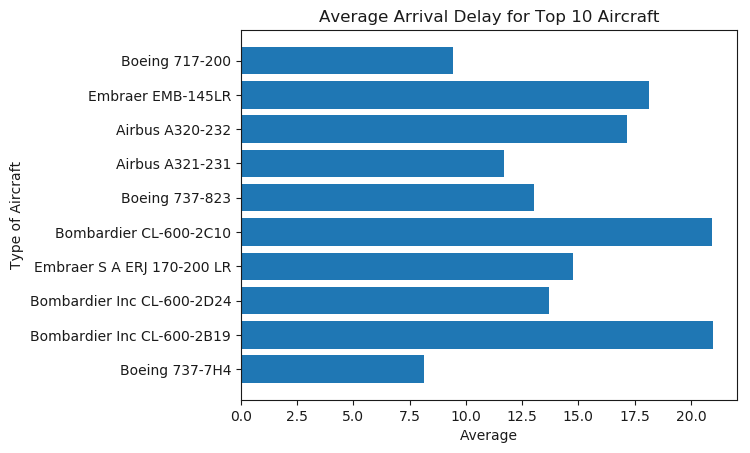

In [185]:
##BOX PLOT ARRIVAL 
name =('Boeing 737-7H4','Bombardier Inc CL-600-2B19', 'Bombardier Inc CL-600-2D24','Embraer S A ERJ 170-200 LR','Bombardier CL-600-2C10','Boeing 737-823','Airbus A321-231','Airbus A320-232','Embraer EMB-145LR','Boeing 717-200')
minutes =  [8.156812949903168,20.996451309884147,13.701453957996769,14.746674960751207,20.921531494442156,13.01348080133556,11.687617358648028,17.158299683509767,18.138230846774192,9.429098263145372]
fig, ax = plt.subplots()
ax.barh(name,minutes)
ax.set_title('Average Arrival Delay for Top 10 Aircraft')
ax.set_xlabel('Average')
ax.set_ylabel('Type of Aircraft')

#ax.invert_yaxis()

In [32]:
## DEPARTURE FOR TOP 10


In [33]:
## FIRST MOST COMMON
counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)


most_common =[]

start_1 = 0
for x in range(len(matching)):
    if matching[x] == "1384404": 
        if minutes_without_nan[x] != 'nan':
            start_1 += float(minutes_without_nan[x])

## BOING 737-7H4 

                       
print("The sum of the minutes delayed")                          
print(start_1)   
print("The average delayed minutes for departures:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "1384404"].mean())
print("The average standard deviation for departured")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "1383700"].std())

The sum of the minutes delayed
505924.0
The average delayed minutes for departures:
9.22966341329928
The average standard deviation for departured
45.00101268889772


In [34]:
## SECOND MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)


most_common =[]

start_2 = 0
for x in range(len(matching)):
    if matching[x] == "1390008": 
        if minutes_without_nan[x] != 'nan':
            start_2 += float(minutes_without_nan[x])

##BOMBARDIER INC     CL-600-2B19   

                       
print("The sum of the minutes delayed")                          
print(start_2)   
print("The average delayed minutes for departures:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "1390008"].mean())
print("The average standard deviation for adepartured")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "1390008"].std())

The sum of the minutes delayed
782082.0
The average delayed minutes for departures:
20.28747081712062
The average standard deviation for adepartured
69.39873033825113


In [35]:
##THIRD MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)


most_common =[]

start_3 = 0
for x in range(len(matching)):
    if matching[x] == "1390016": 
        if minutes_without_nan[x] != 'nan':
            start_3 += float(minutes_without_nan[x])

## BOMBARDIER INC          CL-600-2D24 

                       
print("The sum of the minutes delayed")                          
print(start_3)   
print("The average delayed minutes for departured:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "1390016"].mean())
print("The average standard deviation for departured")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "1390016"].std())

The sum of the minutes delayed
500418.0
The average delayed minutes for departured:
13.44017403915881
The average standard deviation for departured
50.24876795949286


In [36]:
##FOURTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)


most_common =[]

start_4 = 0
for x in range(len(matching)):
    if matching[x] == "3260415": 
        if minutes_without_nan[x] != 'nan':
            start_4 += float(minutes_without_nan[x])


## EMBRAER S A     - ERJ 170-200 LR 
                       
print("The sum of the minutes delayed")                          
print(start_4)   
print("The average delayed minutes for departured:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "3260415"].mean())
print("The average standard deviation for departured")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "3260415"].std())

The sum of the minutes delayed
441149.0
The average delayed minutes for departured:
13.00250530535251
The average standard deviation for departured
44.28473906218415


In [37]:
##FIFTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)


most_common =[]

start_5 = 0
for x in range(len(matching)):
    if matching[x] == "1390015": 
        if minutes_without_nan[x] != 'nan':
            start_5 += float(minutes_without_nan[x])
## BOMBARDIER INC     CL-600-2C10     


                       
print("The sum of the minutes delayed")                          
print(start_5)   
print("The average delayed minutes for departured:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "1390015"].mean())
print("The average standard deviation for departured")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "1390015"].std())

The sum of the minutes delayed
489259.0
The average delayed minutes for departured:
20.025335625409298
The average standard deviation for departured
71.54272485705047


In [38]:
##SIXTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)


most_common =[]

start_6 = 0
for x in range(len(matching)):
    if matching[x] == "13844CB": 
        if minutes_without_nan[x] != 'nan':
            start_6 += float(minutes_without_nan[x])

##BOEING 737-823   

                       
print("The sum of the minutes delayed")                          
print(start_6)   
print("The average delayed minutes for departured:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "13844CB"].mean())
print("The average standard deviation for departured")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "13844CB"].std())

The sum of the minutes delayed
287428.0
The average delayed minutes for departured:
11.962708619469764
The average standard deviation for departured
42.14353181776666


In [39]:
##SEVENTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)


most_common =[]

start_7 = 0
for x in range(len(matching)):
    if matching[x] == "3940032": 
        if minutes_without_nan[x] != 'nan':
            start_7+= float(minutes_without_nan[x])

##Airbus A321-231   

                       
print("The sum of the minutes delayed")                          
print(start_7)   
print("The average delayed minutes for departured:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "3940032"].mean())
print("The average standard deviation for departured")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "3940032"].std())

The sum of the minutes delayed
216313.0
The average delayed minutes for departured:
11.252822140144618
The average standard deviation for departured
39.66617757942443


In [40]:
##EIGTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)


most_common =[]

start_8 = 0
for x in range(len(matching)):
    if matching[x] == "3940004": 
        if minutes_without_nan[x] != 'nan':
            start_8 += float(minutes_without_nan[x])

            
           ## Airbus A320-232   

                    
print("The sum of the minutes delayed")                          
print(start_8)   
print("The average delayed minutes for departured:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "3940004"].mean())
print("The average standard deviation for departured")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "3940004"].std())

The sum of the minutes delayed
316267.0
The average delayed minutes for departured:
17.205255140898704
The average standard deviation for departured
51.6503156264539


In [41]:
##NINTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)


most_common =[]

start_9 = 0
for x in range(len(matching)):
    if matching[x] == "3260212": 
        if minutes_without_nan[x] != 'nan':
            start_9 += float(minutes_without_nan[x])
## Embraer EMB-145LR

                       
print("The sum of the minutes delayed")                          
print(start_9)   
print("The average delayed minutes for departured:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "3260212"].mean())
print("The average standard deviation for departured")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "3260212"].std())

The sum of the minutes delayed
248904.0
The average delayed minutes for departured:
15.623877973761848
The average standard deviation for departured
52.311437762979615


In [42]:
##TENTH MOST COMMON 

counter  = Counter ()
matching = performance_master_aircraft["CODE"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)


most_common =[]

start_10 = 0
for x in range(len(matching)):
    if matching[x] == "1383700": 
        if minutes_without_nan[x] != 'nan':
            start_10 += float(minutes_without_nan[x])

## Tenth Most common type of plane
## Boeing 717-200   
                
print("The sum of the minutes delayed")                          
print(start_10)   
print("The average delayed minutes for departured:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "1383700"].mean())
print("The average standard deviation for departured")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["CODE"] == "1383700"].std()) 

The sum of the minutes delayed
154530.0
The average delayed minutes for departured:
9.181272651654686
The average standard deviation for departured
45.00101268889772


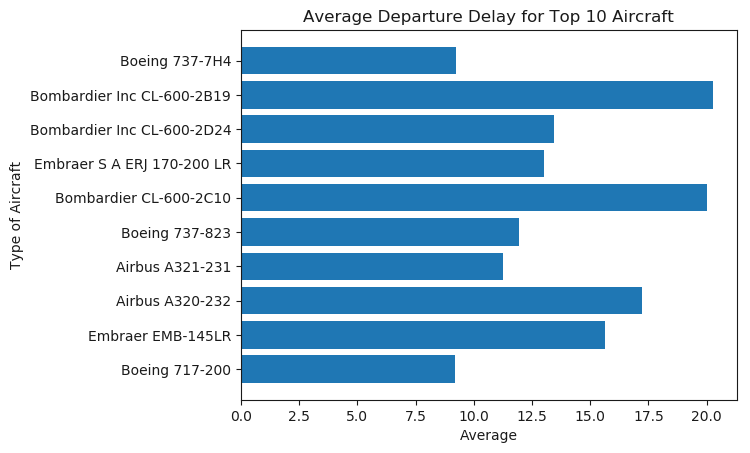

In [186]:
##BOX PLOT Departure
name =('Boeing 737-7H4','Bombardier Inc CL-600-2B19', 'Bombardier Inc CL-600-2D24','Embraer S A ERJ 170-200 LR','Bombardier CL-600-2C10','Boeing 737-823','Airbus A321-231','Airbus A320-232','Embraer EMB-145LR','Boeing 717-200')
minutes =  [9.22966341329928,20.28747081712062,13.44017403915881,13.00250530535251,20.025335625409298,11.962708619469764,11.252822140144618,17.205255140898704,15.623877973761848,9.181272651654686]
fig, ax = plt.subplots()
ax.barh(name,minutes)
ax.set_title('Average Departure Delay for Top 10 Aircraft')
ax.set_xlabel('Average')
ax.set_ylabel('Type of Aircraft')
ax.invert_yaxis()

In [205]:
##SIGNIFICANCE DATASET
##For the most frequently delayed aircraft 
t_1 = non[non["CODE"]=='1390008']["ArrDelayMinutes"]
t_2 = non[non["CODE"]!='1390008'] ["ArrDelayMinutes"]
t_test = scipy.stats.ttest_ind(t_1,t_2)
print(t_test)


t_1 = non[non["CODE"]=='1390008']["DepDelayMinutes"]
t_2 = non[non["CODE"]!='1390008'] ["DepDelayMinutes"]
t_test = scipy.stats.ttest_ind(t_1,t_2)
print(t_test)



Ttest_indResult(statistic=31.604799313766218, pvalue=4.9677054594312635e-219)
Ttest_indResult(statistic=29.94152730350271, pvalue=8.142251489451579e-197)


# ANALYSIS Location (Origin, Desination)  , Statsitcs ,Hypothesis Testing, Graphs


In [405]:
##Counting Origin City Names most comomn top 10 and the frequency that they occur 

origin = performance_master_aircraft["OriginCityName"]
counter = Counter(origin).most_common(10)
print(counter)

[('Chicago, IL', 31903), ('Atlanta, GA', 30964), ('New York, NY', 24030), ('Dallas/Fort Worth, TX', 22954), ('Houston, TX', 19567), ('Charlotte, NC', 18900), ('Denver, CO', 18429), ('Los Angeles, CA', 17660), ('Washington, DC', 16892), ('Phoenix, AZ', 14703)]


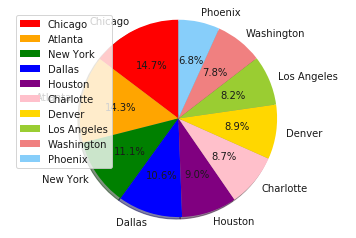

In [204]:
import matplotlib.pyplot as plt

# ORIGIN DATSET DISTRIBUTION 
topic = ["Chicago","Atlanta","New York","Dallas","Houston","Charlotte","Denver","Los Angeles","Washington","Phoenix"]
sizes = [31903,30964,24030,22954,19567,18900,19429,17760,16892,14703]
colors = ['red','orange','green','blue','purple','pink','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
labels = list(topic)
# makeitastring = ''.join(map(str, labels))
##print(labels)

plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)   #line 240
#plt.pie(sizes, labels, colors)
plt.axis('equal')
plt.legend()
plt.show()
# Plot
##plt.pie(sizes, explode=explode, labels=labels, colors=colors,
##autopct='%1.1f%%', shadow=True, startangle=100)

##plt.axis('equal')
##plt.show()

In [406]:
##Counting destination City Names most comomn top 10 and the frequency that they occur 

destination = performance["DestCityName"]
counter = Counter(destination).most_common(10)
print(counter)

[('Chicago, IL', 32624), ('Atlanta, GA', 31151), ('New York, NY', 24365), ('Dallas/Fort Worth, TX', 23078), ('Houston, TX', 19588), ('Charlotte, NC', 19105), ('Denver, CO', 18498), ('Los Angeles, CA', 17977), ('Washington, DC', 17066), ('Phoenix, AZ', 15218)]


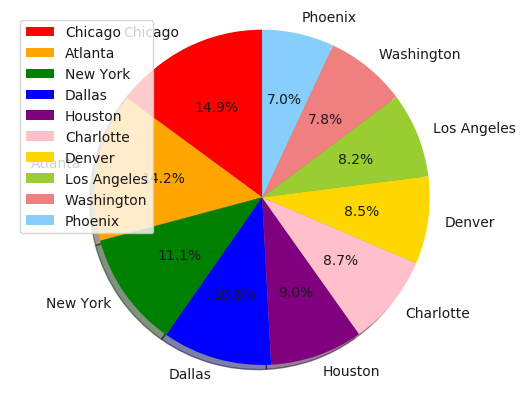

In [187]:
import matplotlib.pyplot as plt

# DEPARTURE DATSET DISTRIBUTION 
topic = ["Chicago","Atlanta","New York","Dallas","Houston","Charlotte","Denver","Los Angeles","Washington","Phoenix"]
sizes = [32625,31151,24365,23078,19588,19105,18498,17977,17066,15218]
colors = ['red','orange','green','blue','purple','pink','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
labels = list(topic)
# makeitastring = ''.join(map(str, labels))
##print(labels)

plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)   #line 240
#plt.pie(sizes, labels, colors)
plt.axis('equal')
plt.legend()
plt.show()
# Plot
##plt.pie(sizes, explode=explode, labels=labels, colors=colors,
##autopct='%1.1f%%', shadow=True, startangle=100)

##plt.axis('equal')
##plt.show()

In [407]:
## Chicago for origin Flights #1
print("Chicago")
print("\n")
origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
chicago= 0
origin_city_arrival = []
for name in range(len(origin)):
    if origin[name] == 'Chicago, IL': 
        if minutes_without_nan[name] != 'nan':
            chicago += float(minutes_without_nan[name])
      
            
print("Origin City and Arrival")
print("The sum of the minutes delayed") 
print(chicago)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Chicago, IL"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Chicago, IL"].std())

print("\n")


origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
chicago= 0
for name in range(len(origin)):
    if origin[name] == 'Chicago, IL':
        
        if minutes_without_nan[name] != 'nan':
            chicago += float(minutes_without_nan[name])
print("Origin City and Departure")   
print("The sum of the minutes delayed") 
print(chicago)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Chicago, IL"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Chicago, IL"].std())

print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
chicago= 0
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        
        if minutes_without_nan[name] != 'nan':
            chicago += float(minutes_without_nan[name])

print("Desination City and Arrival")
print("The sum of the minutes delayed") 
print(chicago)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Chicago, IL"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Chicago, IL"].std())

print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
chicago= 0
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        
        if minutes_without_nan[name] != 'nan':
            chicago += float(minutes_without_nan[name])
print("Desination City and Departure")
print("The sum of the minutes delayed") 
print(chicago)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Chicago, IL"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Chicago, IL"].std())


Chicago


Origin City and Arrival
The sum of the minutes delayed
688233.0
The average amount delayed given the frequency of the city:
23.795353179130796
The standard deviation:
58.99128559079512


Origin City and Departure
The sum of the minutes delayed
637476.0
The average amount delayed given the frequency of the city:
21.96072757337743
The standard deviation:
57.920690560976865


Desination City and Arrival
The sum of the minutes delayed
699469.0
The average amount delayed given the frequency of the city:
24.266053772766696
The standard deviation:
74.47819325778335


Desination City and Departure
The sum of the minutes delayed
650121.0
The average amount delayed given the frequency of the city:
22.435759395382544
The standard deviation:
73.4718988138692


In [105]:
## Atlanta for Origin Flights #2

print("Atlanta")
print("\n")
origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
atlanta= 0
origin_city_arrival = []
for name in range(len(origin)):
    if origin[name] == 'Atlanta, GA': 
        if minutes_without_nan[name] != 'nan':
            atlanta += float(minutes_without_nan[name])
      
            
print("Origin City and Arrival")
print("The sum of the minutes delayed") 
print(atlanta)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Atlanta, GA"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Atlanta, GA"].std())
print("\n")

origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
atlanta= 0
for name in range(len(origin)):
    if origin[name] == 'Atlanta, GA':
        
        if minutes_without_nan[name] != 'nan':
            atlanta += float(minutes_without_nan[name])
print("Origin City and Departure")   
print("The sum of the minutes delayed") 
print(atlanta)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Atlanta, GA"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Atlanta, GA"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
atlanta= 0
for name in range(len(destination)):
    if destination[name] == 'Atlanta, GA':
        
        if minutes_without_nan[name] != 'nan':
            atlanta += float(minutes_without_nan[name])

print("Desination City and Arrival")
print("The sum of the minutes delayed") 
print(atlanta)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Atlanta, GA"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Atlanta, GA"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
atlanta= 0
for name in range(len(destination)):
    if destination[name] == 'Atlanta, GA':
        
        if minutes_without_nan[name] != 'nan':
            atlanta += float(minutes_without_nan[name])
print("Desination City and Departure")
print("The sum of the minutes delayed") 
print(atlanta)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Atlanta, GA"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Atlanta, GA"].std())

Atlanta


Origin City and Arrival
The sum of the minutes delayed
244841.0
The average amount delayed given the frequency of the city:
7.997158348575908
The standard deviation:
31.46148562397408


Origin City and Departure
The sum of the minutes delayed
251194.0
The average amount delayed given the frequency of the city:
8.188082665102028
The standard deviation:
32.00445883374547


Desination City and Arrival
The sum of the minutes delayed
273290.0
The average amount delayed given the frequency of the city:
8.9228810238997
The standard deviation:
39.69396833745217


Desination City and Departure
The sum of the minutes delayed
267407.0
The average amount delayed given the frequency of the city:
8.723396620343186
The standard deviation:
39.56024774908219


In [408]:
## New York  for Origin Flights #3

print("New York")
print("\n")
origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
new_york= 0
for name in range(len(origin)):
    if origin[name] == 'New York, NY':
        
        if minutes_without_nan[name] != 'nan':
            new_york += float(minutes_without_nan[name])
            
print("Origin City and Arrival")
print("The sum of the minutes delayed") 
print(new_york)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "New York, NY"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "New York, NY"].std())
print("\n")


origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)

new_york= 0
for name in range(len(origin)):
    if origin[name] == 'New York, NY':
        
        if minutes_without_nan[name] != 'nan':
            new_york += float(minutes_without_nan[name])
print("Origin City and Departure")   
print("The sum of the minutes delayed") 
print(new_york)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "New York, NY"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "New York, NY"].std())
print("\n")

destination = performance["DestCityName"]
minutes_without_nan = performance["DepDelayMinutes"].astype(str)
new_york= 0
for name in range(len(destination)):
    if destination[name] == 'New York, NY':
        
        if minutes_without_nan[name] != 'nan':
            new_york += float(minutes_without_nan[name])

print("Desination City and Arrival")
print("The sum of the minutes delayed") 
print(new_york)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "New York, NY"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "New York, NY"].std())
print("\n")

destination = performance["DestCityName"]
minutes_without_nan = performance["ArrDelayMinutes"].astype(str)
new_york= 0
for name in range(len(destination)):
    if destination[name] == 'New York, NY':
        
        if minutes_without_nan[name] != 'nan':
            new_york += float(minutes_without_nan[name])
print("Desination City and Departure")
print("The sum of the minutes delayed") 
print(new_york)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "New York, NY"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "New York, NY"].std())

New York


Origin City and Arrival
The sum of the minutes delayed
470998.0
The average amount delayed given the frequency of the city:
20.204967611857064
The standard deviation:
51.62841306694483


Origin City and Departure
The sum of the minutes delayed
460177.0
The average amount delayed given the frequency of the city:
19.666524210436343
The standard deviation:
51.743915680995414


Desination City and Arrival
The sum of the minutes delayed
514806.0
The average amount delayed given the frequency of the city:
21.771223390612978
The standard deviation:
55.76812501884459


Desination City and Departure
The sum of the minutes delayed
559729.0
The average amount delayed given the frequency of the city:
23.77223985588059
The standard deviation:
56.43767911726229


In [155]:
##  Dallas for Origin Flights #4

print("Dallas")
print("\n")
origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
tx= 0
for name in range(len(origin)):
    if origin[name] == 'Dallas/Fort Worth, TX':
        
        if minutes_without_nan[name] != 'nan':
            tx += float(minutes_without_nan[name])
            
print("Origin City and Arrival")
print("The sum of the minutes delayed") 
print(tx)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Dallas/Fort Worth, TX"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Dallas/Fort Worth, TX"].std())
print("\n")


origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
tx= 0
for name in range(len(origin)):
    if origin[name] == 'Dallas/Fort Worth, TX':
        
        if minutes_without_nan[name] != 'nan':
            tx += float(minutes_without_nan[name])
print("Origin City and Departure")   
print("The sum of the minutes delayed") 
print(tx)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Dallas/Fort Worth, TX"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Dallas/Fort Worth, TX"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
tx= 0
for name in range(len(destination)):
    if destination[name] == 'Dallas/Fort Worth, TX':
        
        if minutes_without_nan[name] != 'nan':
            tx += float(minutes_without_nan[name])

print("Desination City and Arrival")
print("The sum of the minutes delayed") 
print(tx)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Dallas/Fort Worth, TX"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Dallas/Fort Worth, TX"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
tx= 0
for name in range(len(destination)):
    if destination[name] == 'Dallas/Fort Worth, TX':
        
        if minutes_without_nan[name] != 'nan':
            tx += float(minutes_without_nan[name])
print("Desination City and Departure")
print("The sum of the minutes delayed") 
print(tx)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Dallas/Fort Worth, TX"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Dallas/Fort Worth, TX"].std())

Dallas


Origin City and Arrival
The sum of the minutes delayed
259268.0
The average amount delayed given the frequency of the city:
11.462905650366965
The standard deviation:
37.274150702014516


Origin City and Departure
The sum of the minutes delayed
251705.0
The average amount delayed given the frequency of the city:
11.087837540196468
The standard deviation:
38.26436608045264


Desination City and Arrival
The sum of the minutes delayed
292472.0
The average amount delayed given the frequency of the city:
12.920086583911296
The standard deviation:
51.73699086306625


Desination City and Departure
The sum of the minutes delayed
263572.0
The average amount delayed given the frequency of the city:
11.62749250044115
The standard deviation:
51.94097466965688


In [409]:
## Houston  for Origin Flights #5

print("Houston")
print("\n")
origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
houston= 0
for name in range(len(origin)):
    if origin[name] == 'Houston, TX':
        
        if minutes_without_nan[name] != 'nan':
            houston += float(minutes_without_nan[name])
            
print("Origin City and Arrival")
print("The sum of the minutes delayed") 
print(houston)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Houston, TX"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Houston, TX"].std())
print("\n")


origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
houston= 0
for name in range(len(origin)):
    if origin[name] == 'Houston, TX':
        
        if minutes_without_nan[name] != 'nan':
            houston += float(minutes_without_nan[name])
print("Origin City and Departure")   
print("The sum of the minutes delayed") 
print(houston)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Houston, TX"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Houston, TX"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
houston= 0
for name in range(len(destination)):
    if destination[name] == 'Houston, TX':
        
        if minutes_without_nan[name] != 'nan':
            houston += float(minutes_without_nan[name])

print("Desination City and Arrival")
print("The sum of the minutes delayed") 
print(houston)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Houston, TX"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Houston, TX"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
houston= 0
for name in range(len(destination)):
    if destination[name] == 'Houston, TX':
        
        if minutes_without_nan[name] != 'nan':
            houston += float(minutes_without_nan[name])
print("Desination City and Departure")
print("The sum of the minutes delayed") 
print(houston)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Houston, TX"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Houston, TX"].std())

Houston


Origin City and Arrival
The sum of the minutes delayed
186021.0
The average amount delayed given the frequency of the city:
9.601083870967742
The standard deviation:
35.15745069372548


Origin City and Departure
The sum of the minutes delayed
194851.0
The average amount delayed given the frequency of the city:
10.034038827952006
The standard deviation:
35.97024618466269


Desination City and Arrival
The sum of the minutes delayed
187186.0
The average amount delayed given the frequency of the city:
9.682201417265816
The standard deviation:
34.95062688052788


Desination City and Departure
The sum of the minutes delayed
175667.0
The average amount delayed given the frequency of the city:
9.074646141130282
The standard deviation:
35.206225069376735


In [433]:
## Charlotte  for Origin Flights #6

print("Charlotte")
print("\n")
origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
charlotte= 0
for name in range(len(origin)):
    if origin[name] == 'Charlotte, NC':
        
        if minutes_without_nan[name] != 'nan':
            charlotte += float(minutes_without_nan[name])
            
print("Origin City and Arrival")
print("The sum of the minutes delayed") 
print(charlotte)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Charlotte, NC"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Charlotte, NC"].std())
print("\n")


origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
charlotte= 0
for name in range(len(origin)):
    if origin[name] == 'Charlotte, NC':
        
        if minutes_without_nan[name] != 'nan':
            charlotte += float(minutes_without_nan[name])
print("Origin City and Departure")   
print("The sum of the minutes delayed") 
print(charlotte)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Charlotte, NC"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Charlotte, NC"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
charlotte= 0
for name in range(len(destination)):
    if destination[name] == 'Charlotte, NC':
        
        if minutes_without_nan[name] != 'nan':
            charlotte += float(minutes_without_nan[name])

print("Desination City and Arrival")
print("The sum of the minutes delayed") 
print(charlotte)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Charlotte, NC"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Charlotte, NC"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
charlotte= 0
for name in range(len(destination)):
    if destination[name] == 'Charlotte, NC':
        
        if minutes_without_nan[name] != 'nan':
            charlotte += float(minutes_without_nan[name])
print("Desination City and Departure")
print("The sum of the minutes delayed") 
print(charlotte)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Charlotte, NC"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Charlotte, NC"].std())

Charlotte


Origin City and Arrival
The sum of the minutes delayed
176425.0
The average amount delayed given the frequency of the city:
9.478590232633106
The standard deviation:
30.98322924113229


Origin City and Departure
The sum of the minutes delayed
169876.0
The average amount delayed given the frequency of the city:
9.09838787424348
The standard deviation:
31.479865153700366


Desination City and Arrival
The sum of the minutes delayed
183626.0
The average amount delayed given the frequency of the city:
9.860702395016647
The standard deviation:
39.61236958278124


Desination City and Departure
The sum of the minutes delayed
183786.0
The average amount delayed given the frequency of the city:
9.860821976606932
The standard deviation:
40.55981797491131


In [410]:
## Denver  for Origin Flights #7

print("Denver")
print("\n")
origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
denver= 0
for name in range(len(origin)):
    if origin[name] == 'Denver, CO':
        
        if minutes_without_nan[name] != 'nan':
            
            denver += float(minutes_without_nan[name])
            
print("Origin City and Arrival")
print("The sum of the minutes delayed") 
print(denver)
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Denver, CO"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Denver, CO"].std())
print("\n")


origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
denver= 0
for name in range(len(origin)):
    if origin[name] == 'Denver, CO':
        
        if minutes_without_nan[name] != 'nan':
            denver+= float(minutes_without_nan[name])
print("Origin City and Departure")   
print("The sum of the minutes delayed") 
print(denver)
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Denver, CO"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Denver, CO"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
denver= 0
for name in range(len(destination)):
    if destination[name] == 'Denver, CO':
        
        if minutes_without_nan[name] != 'nan':
            denver += float(minutes_without_nan[name])

print("Desination City and Arrival")
print("The sum of the minutes delayed") 
print(denver)
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Denver, CO"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Denver, CO"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
denver= 0
for name in range(len(destination)):
    if destination[name] == 'Denver, CO':
        
        if minutes_without_nan[name] != 'nan':
            denver += float(minutes_without_nan[name])
print("Desination City and Departure")
print("The sum of the minutes delayed") 
print(denver)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Denver, CO"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Denver, CO"].std())

Denver


Origin City and Arrival
The sum of the minutes delayed
215773.0
11.858917284968397
The standard deviation:
37.81568442887848


Origin City and Departure
The sum of the minutes delayed
222563.0
12.170558320118117
The standard deviation:
38.36017121829357


Desination City and Arrival
The sum of the minutes delayed
214371.0
11.77345123022847
The standard deviation:
43.90074566816791


Desination City and Departure
The sum of the minutes delayed
218591.0
The average amount delayed given the frequency of the city:
11.995335564945398
The standard deviation:
44.47711098504274


In [434]:
## Los Angeles  for Origin Flights #8

print("Los Angeles")
print("\n")
origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
la= 0
for name in range(len(origin)):
    if origin[name] == 'Los Angeles, CA':
        
        if minutes_without_nan[name] != 'nan':
            la += float(minutes_without_nan[name])
            
print("Origin City and Arrival")
print("The sum of the minutes delayed") 
print(la)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Los Angeles, CA"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Los Angeles, CA"].std())
print("\n")


origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
la= 0
for name in range(len(origin)):
    if origin[name] == 'Los Angeles, CA':
        
        if minutes_without_nan[name] != 'nan':
            la+= float(minutes_without_nan[name])
print("Origin City and Departure")   
print("The sum of the minutes delayed") 
print(la)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Los Angeles, CA"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Los Angeles, CA"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
la= 0
for name in range(len(destination)):
    if destination[name] == 'Los Angeles, CA':
        
        if minutes_without_nan[name] != 'nan':
            la += float(minutes_without_nan[name])

print("Desination City and Arrival")
print("The sum of the minutes delayed") 
print(la)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Los Angeles, CA"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Los Angeles, CA"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
la= 0
for name in range(len(destination)):
    if destination[name] == 'Los Angeles, CA':
        
        if minutes_without_nan[name] != 'nan':
            la += float(minutes_without_nan[name])
print("Desination City and Departure")
print("The sum of the minutes delayed") 
print(la)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Los Angeles, CA"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Los Angeles, CA"].std())

Los Angeles


Origin City and Arrival
The sum of the minutes delayed
205480.0
The average amount delayed given the frequency of the city:
11.839815615096514
The standard deviation:
42.20421868850978


Origin City and Departure
The sum of the minutes delayed
209599.0
The average amount delayed given the frequency of the city:
12.028637015781923
The standard deviation:
42.15145300284716


Desination City and Arrival
The sum of the minutes delayed
215594.0
The average amount delayed given the frequency of the city:
12.428316135354816
The standard deviation:
43.61125980181453


Desination City and Departure
The sum of the minutes delayed
207712.0
The average amount delayed given the frequency of the city:
11.948458352508053
The standard deviation:
43.86008897459843


In [411]:
## Washington  for Origin Flights #9

print("Washington DC")
print("\n")
origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
dc= 0
for name in range(len(origin)):
    if origin[name] == 'Washington, DC':
        
        if minutes_without_nan[name] != 'nan':
            dc += float(minutes_without_nan[name])
            
print("Origin City and Arrival")
print("The sum of the minutes delayed") 
print(dc)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Washington, DC"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Washington, DC"].std())
print("\n")


origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
dc= 0
for name in range(len(origin)):
    if origin[name] == 'Washington, DC':
        
        if minutes_without_nan[name] != 'nan':
            dc+= float(minutes_without_nan[name])
print("Origin City and Departure")   
print("The sum of the minutes delayed") 
print(dc)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Washington, DC"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Washington, DC"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
dc= 0
for name in range(len(destination)):
    if destination[name] == 'Washington, DC':
        
        if minutes_without_nan[name] != 'nan':
            dc += float(minutes_without_nan[name])

print("Desination City and Arrival")
print("The sum of the minutes delayed") 
print(dc)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Washington, DC"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Washington, DC"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
dc= 0
for name in range(len(destination)):
    if destination[name] == 'Washington, DC':
        
        if minutes_without_nan[name] != 'nan':
            dc += float(minutes_without_nan[name])
print("Desination City and Departure")
print("The sum of the minutes delayed") 
print(dc)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Washington, DC"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Washington, DC"].std())

Washington DC


Origin City and Arrival
The sum of the minutes delayed
270955.0
The average amount delayed given the frequency of the city:
16.71839328685136
The standard deviation:
55.200296513868636


Origin City and Departure
The sum of the minutes delayed
242726.0
The average amount delayed given the frequency of the city:
14.91862323294407
The standard deviation:
53.83326045283291


Desination City and Arrival
The sum of the minutes delayed
231641.0
The average amount delayed given the frequency of the city:
14.32624157338116
The standard deviation:
48.76222240856106


Desination City and Departure
The sum of the minutes delayed
217869.0
The average amount delayed given the frequency of the city:
13.425499137293567
The standard deviation:
48.512142030133894


In [435]:
## Phoenix  for Origin Flights #10

print("Phoenix")
print("\n")
origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
az= 0
for name in range(len(origin)):
    if origin[name] == 'Phoenix, AZ':
        
        if minutes_without_nan[name] != 'nan':
            az += float(minutes_without_nan[name])
            
print("Origin City and Arrival")
print("The sum of the minutes delayed") 
print(az)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Phoenix, AZ"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["OriginCityName"] == "WPhoenix, AZ"].std())
print("\n")


origin = performance_master_aircraft["OriginCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
az= 0
for name in range(len(origin)):
    if origin[name] == 'Phoenix, AZ':
        
        if minutes_without_nan[name] != 'nan':
            az+= float(minutes_without_nan[name])
print("Origin City and Departure")   
print("The sum of the minutes delayed") 
print(az)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "Phoenix, AZ"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["OriginCityName"] == "WPhoenix, AZ"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
az= 0
for name in range(len(destination)):
    if destination[name] == 'Phoenix, AZ':
        
        if minutes_without_nan[name] != 'nan':
            az += float(minutes_without_nan[name])

print("Desination City and Arrival")
print("The sum of the minutes delayed") 
print(az)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "Phoenix, AZ"].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DestCityName"] == "WPhoenix, AZ"].std())
print("\n")

destination = performance_master_aircraft["DestCityName"]
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
az= 0
for name in range(len(destination)):
    if destination[name] == 'Phoenix, AZ':
        
        if minutes_without_nan[name] != 'nan':
            az += float(minutes_without_nan[name])
print("Desination City and Departure")
print("The sum of the minutes delayed") 
print(az)
print("The average amount delayed given the frequency of the city:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "Phoenix, AZ"].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DestCityName"] == "WPhoenix, AZ"].std())

Phoenix


Origin City and Arrival
The sum of the minutes delayed
127714.0
The average amount delayed given the frequency of the city:
8.806647358984968
The standard deviation:
nan


Origin City and Departure
The sum of the minutes delayed
136135.0
The average amount delayed given the frequency of the city:
9.361504607344244
The standard deviation:
nan


Desination City and Arrival
The sum of the minutes delayed
137469.0
The average amount delayed given the frequency of the city:
9.470823286255598
The standard deviation:
nan


Desination City and Departure
The sum of the minutes delayed
145650.0
The average amount delayed given the frequency of the city:
10.025468061674008
The standard deviation:
nan


In [412]:
##SIGNIFICANCE DATASET
## The null hypothesis is there is no significant difference between the average 
##amount in minutes delayed for Chicago, IL  and the average time in minutes of any other US city location.

t_1 = non[non["OriginCityName"]=='Chicago, IL']["ArrDelayMinutes"]
t_2 = non[non["OriginCityName"]!='Chicago, IL'] ["ArrDelayMinutes"]
t_test = scipy.stats.ttest_ind(t_1,t_2)

print("The Most Common City arriving late:Chicago based on Arrival Minutes Delayed")
print(t_test)

##signiifcantly dfiferenec 
##arrival delayed minutes is significant different from the best

t_1 = non[non["OriginCityName"]=='Chicago, IL']["DepDelayMinutes"]
t_2 = non[non["OriginCityName"]!='Chicago, IL'] ["DepDelayMinutes"]
t_test = scipy.stats.ttest_ind(t_1,t_2)

print("The Most Common City arriving late:Chicago based on Departing Minutes Delayed")
print(t_test)

t_1 = non[non["OriginCityName"]=='Chicago, IL']["ArrDelayMinutes"]
t_2 = non[non["OriginCityName"]!='Chicago, IL'] ["ArrDelayMinutes"]
t_test = scipy.stats.ttest_ind(t_1,t_2)
print("The Most Common City departing late:Chicago based on Departing Minutes Delayed")
print(t_test)

t_1 = non[non["DestCityName"]=='Chicago, IL']["DepDelayMinutes"]
t_2 = non[non["DestCityName"]!='Chicago, IL'] ["DepDelayMinutes"]
t_test = scipy.stats.ttest_ind(t_1,t_2)
print("The Most Common City departing late:Chicago based on Departing Minutes Delayed")
print(t_test)



The Most Common City arriving late:Chicago based on Arrival Minutes Delayed
Ttest_indResult(statistic=37.53552338228209, pvalue=5.919242526410711e-308)
The Most Common City arriving late:Chicago based on Departing Minutes Delayed
Ttest_indResult(statistic=31.90548964916742, pvalue=3.5703791361533026e-223)
The Most Common City departing late:Chicago based on Departing Minutes Delayed
Ttest_indResult(statistic=37.53552338228209, pvalue=5.919242526410711e-308)
The Most Common City departing late:Chicago based on Departing Minutes Delayed
Ttest_indResult(statistic=33.035643126376705, pvalue=4.27185989067021e-239)


# Day of Week and Arrival and Departure

In [413]:
##Replacing the Numbers with the Day of the Week 1 being monday sunday being 7 
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new)



In [91]:
counter = Counter(df)
print(counter)


Counter({'Thursday': 96943, 'Wednesday': 95201, 'Tuesday': 91825, 'Friday': 78068, 'Monday': 77335, 'Sunday': 71483, 'Saturday': 60992})


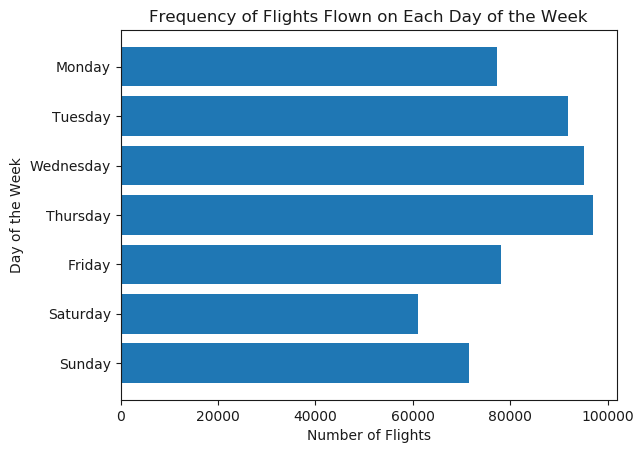

In [189]:
fig, ax = plt.subplots()
name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
minutes = [77335,91825,95201,96943,78068,60992,71483]
ax.barh(name,minutes)
ax.set_title('Frequency of Flights Flown on Each Day of the Week')
ax.set_xlabel('Number of Flights')
ax.set_ylabel('Day of the Week')
ax.invert_yaxis()


The Number in the Dataset For Monday  Departing to Chicago arriving late:
3756
The Maximum is:
1383.0
The Minimum is:
0.0
The Sum is:
124529.0
The mean
14.86164646665342
The standard deviation:
53.02855410528787


The Number in the Dataset For Monday Arriving to Chicago arriving late:
3707
The Maximum is:
1377.0
The Minimum is:
0.0
The Sum is:
128525.0
The mean
15.136631190125032
The standard deviation:
53.27451882325281




Text(0.5,1,'Monday Average Delayed Time')

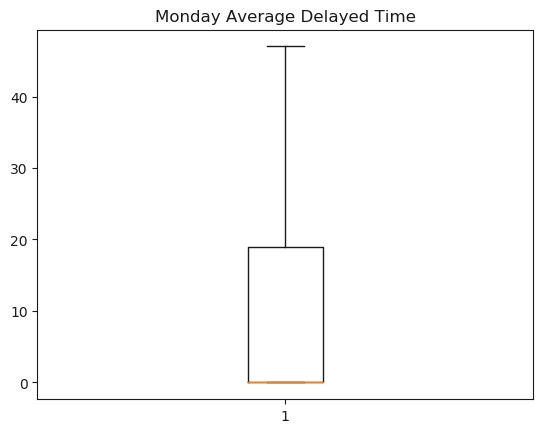

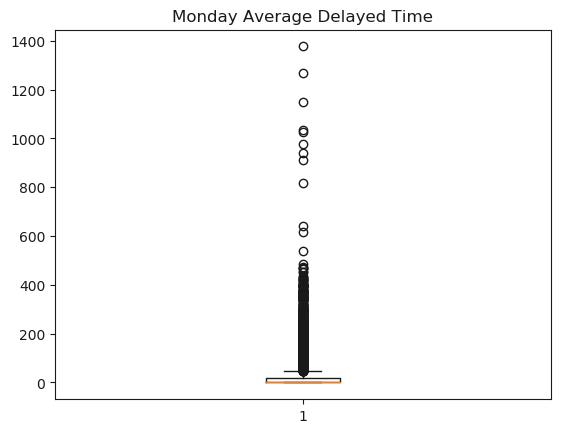

In [195]:
## Monday
destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
chicago_monday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Monday':
            if minutes_without_nan[name] != 'nan':
                chicago_monday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Monday  Departing to Chicago arriving late:")
print(len(chicago_monday))
print("The Maximum is:")
maximum = max(chicago_monday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_monday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 1].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 1].std())
print("\n")



destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
chicago_monday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Monday':
            if minutes_without_nan[name] != 'nan':
                chicago_monday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Monday Arriving to Chicago arriving late:")
print(len(chicago_monday))
print("The Maximum is:")
maximum = max(chicago_monday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_monday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 1].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 1].std())
print("\n")


fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_monday,showfliers=False)
ax2.set_title('Monday Average Delayed Time')

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_monday)
ax2.set_title('Monday Average Delayed Time')

The Number in the Dataset For Tuesday  Departing to Chicago arriving late:
4612
The Maximum is:
1303.0
The Minimum is:
0.0
The Sum is:
124395.0
The mean
12.163453459845183
The standard deviation:
46.81876950053673


The Number in the Dataset For Tuesday Arriving to Chicago arriving late:
4571
The Maximum is:
1322.0
The Minimum is:
0.0
The Sum is:
129966.0
The mean
12.290768262247903
The standard deviation:
46.587032579260146




Text(0.5,1,'Monday Average Delayed Time')

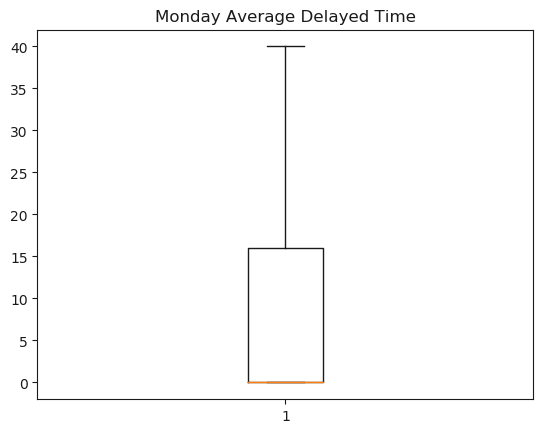

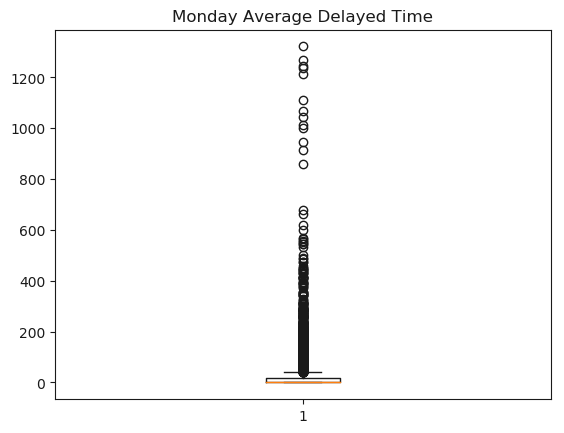

In [414]:
## Tursday
destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
chicago_tuesday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Tuesday':
            if minutes_without_nan[name] != 'nan':
                chicago_tuesday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Tuesday  Departing to Chicago arriving late:")
print(len(chicago_tuesday))
print("The Maximum is:")
maximum = max(chicago_tuesday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_tuesday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 2].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 2].std())
print("\n")



destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
chicago_tuesday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Tuesday':
            if minutes_without_nan[name] != 'nan':
                chicago_tuesday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Tuesday Arriving to Chicago arriving late:")
print(len(chicago_tuesday))
print("The Maximum is:")
maximum = max(chicago_tuesday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_tuesday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 2].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 2].std())
print("\n")

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_tuesday,showfliers=False)
ax2.set_title('Monday Average Delayed Time')

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_tuesday)
ax2.set_title('Monday Average Delayed Time')


The Number in the Dataset For Wednesday  Departing to Chicago arriving late:
4534
The Maximum is:
1186.0
The Minimum is:
0.0
The Sum is:
97131.0
The mean
13.650259459459459
The standard deviation:
46.214248452280046


The Number in the Dataset For Wednesday Arriving to Chicago arriving late:
4524
The Maximum is:
1213.0
The Minimum is:
0.0
The Sum is:
108595.0
The mean
14.162858257815548
The standard deviation:
46.01147001596043




Text(0.5,1,'Monday Average Delayed Time')

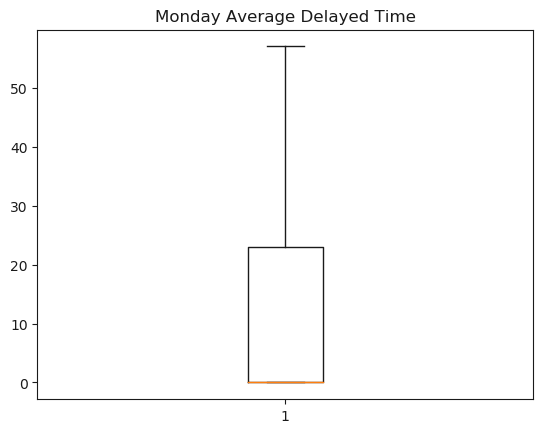

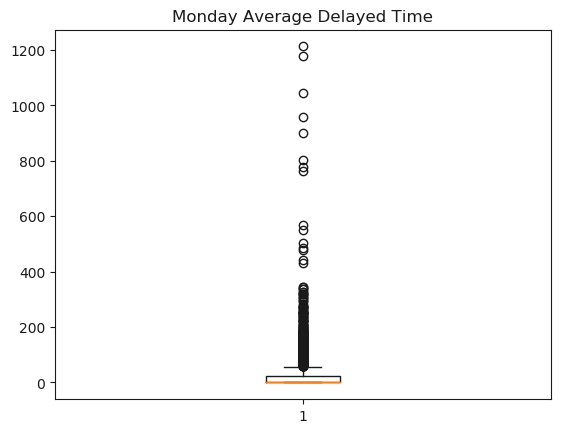

In [415]:
## Wednesday
destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
chicago_wednesday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Wednesday':
            if minutes_without_nan[name] != 'nan':
                chicago_wednesday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Wednesday  Departing to Chicago arriving late:")
print(len(chicago_wednesday))
print("The Maximum is:")
maximum = max(chicago_wednesday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_wednesday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 3].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 3].std())
print("\n")



destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
chicago_wednesday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Wednesday':
            if minutes_without_nan[name] != 'nan':
                chicago_wednesday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Wednesday Arriving to Chicago arriving late:")
print(len(chicago_wednesday))
print("The Maximum is:")
maximum = max(chicago_wednesday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_wednesday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 3].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 3].std())
print("\n")

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_wednesday,showfliers=False)
ax2.set_title('Monday Average Delayed Time')

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_wednesday)
ax2.set_title('Monday Average Delayed Time')

The Number in the Dataset For Thursday  Departing to Chicago arriving late:
4801
The Maximum is:
1261.0
The Minimum is:
0.0
The Sum is:
79341.0
The mean
14.840930909704712
The standard deviation:
46.611697133958046


The Number in the Dataset For Thursday Arriving to Chicago arriving late:
4799
The Maximum is:
1259.0
The Minimum is:
0.0
The Sum is:
83038.0
The mean
15.286518161240506
The standard deviation:
46.58794277139517




Text(0.5,1,'Monday Average Delayed Time')

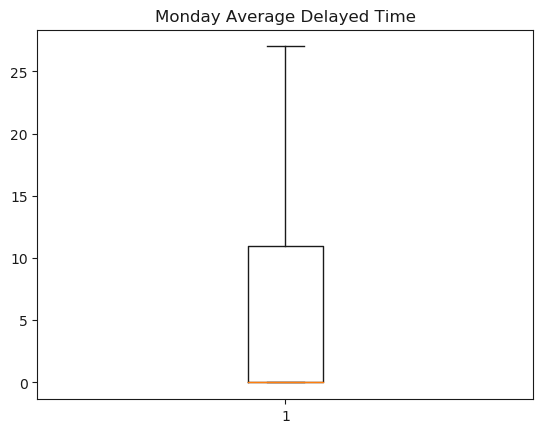

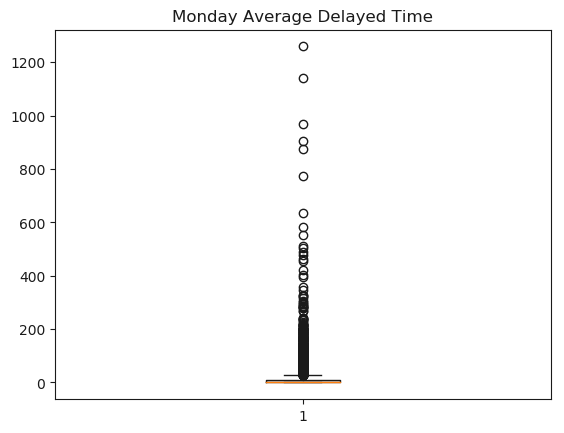

In [416]:
## Thursday
destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
chicago_thursday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Thursday':
            if minutes_without_nan[name] != 'nan':
                chicago_thursday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Thursday  Departing to Chicago arriving late:")
print(len(chicago_thursday))
print("The Maximum is:")
maximum = max(chicago_thursday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_thursday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 4].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 4].std())
print("\n")



destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
chicago_thursday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Thursday':
            if minutes_without_nan[name] != 'nan':
                chicago_thursday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Thursday Arriving to Chicago arriving late:")
print(len(chicago_thursday))
print("The Maximum is:")
maximum = max(chicago_thursday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_thursday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 4].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 4].std())
print("\n")


fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_thursday,showfliers=False)
ax2.set_title('Monday Average Delayed Time')

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_thursday)
ax2.set_title('Monday Average Delayed Time')

The Number in the Dataset For Friday Departing to Chicago arriving late:
4209
The Maximum is:
1113.0
The Minimum is:
0.0
The Sum is:
58287.0
The mean
11.800698848194642
The standard deviation:
40.88795267981776


The Number in the Dataset For Friday Arriving to Chicago arriving late:
4202
The Maximum is:
1108.0
The Minimum is:
0.0
The Sum is:
67446.0
The mean
12.154574582625278
The standard deviation:
40.389659780482674




Text(0.5,1,'Monday Average Delayed Time')

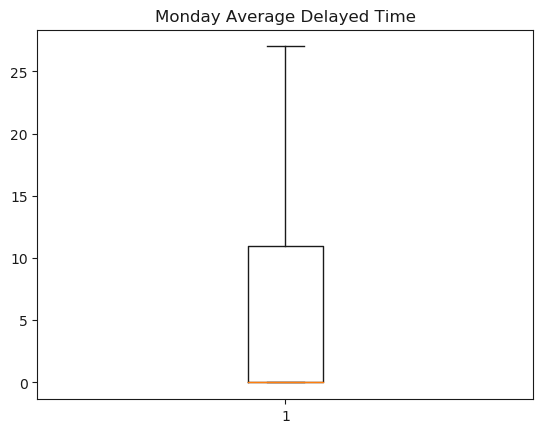

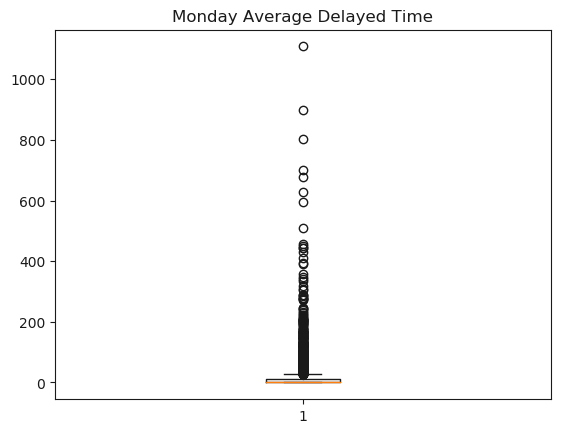

In [417]:
## Friday
destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
chicago_friday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Friday':
            if minutes_without_nan[name] != 'nan':
                chicago_friday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Friday Departing to Chicago arriving late:")
print(len(chicago_friday))
print("The Maximum is:")
maximum = max(chicago_friday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_friday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 5].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 5].std())
print("\n")



destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
chicago_friday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Friday':
            if minutes_without_nan[name] != 'nan':
                chicago_friday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Friday Arriving to Chicago arriving late:")
print(len(chicago_friday))
print("The Maximum is:")
maximum = max(chicago_friday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_friday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 5].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 5].std())
print("\n")

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_friday,showfliers=False)
ax2.set_title('Monday Average Delayed Time')

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_friday)
ax2.set_title('Monday Average Delayed Time')


The Number in the Dataset For Saturday Departing to Chicago arriving late:
3081
The Maximum is:
1421.0
The Minimum is:
0.0
The Sum is:
106645.0
The mean
11.573541079356506
The standard deviation:
49.67463151322177


The Number in the Dataset For Saturday Arriving to Chicago arriving late:
3043
The Maximum is:
1422.0
The Minimum is:
0.0
The Sum is:
116979.0
The mean
12.034531789559212
The standard deviation:
49.78502640441775




Text(0.5,1,'Monday Average Delayed Time')

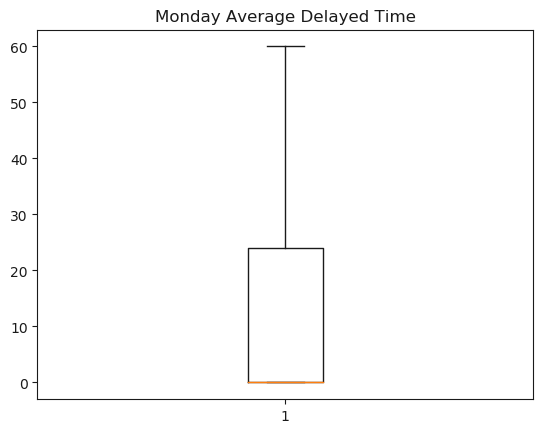

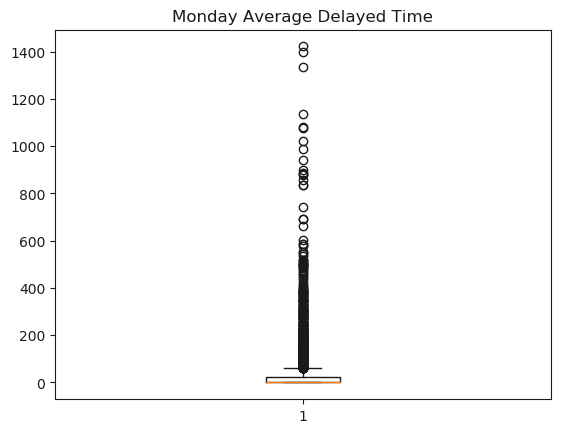

In [418]:
# Saturday
destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
chicago_saturday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Saturday':
            if minutes_without_nan[name] != 'nan':
                chicago_saturday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Saturday Departing to Chicago arriving late:")
print(len(chicago_saturday))
print("The Maximum is:")
maximum = max(chicago_saturday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_saturday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 6].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 6].std())
print("\n")



destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
chicago_saturday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Saturday':
            if minutes_without_nan[name] != 'nan':
                chicago_saturday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Saturday Arriving to Chicago arriving late:")
print(len(chicago_saturday))
print("The Maximum is:")
maximum = max(chicago_saturday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_saturday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 6].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 6].std())
print("\n")

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_saturday,showfliers=False)
ax2.set_title('Monday Average Delayed Time')

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_saturday)
ax2.set_title('Monday Average Delayed Time')


The Number in the Dataset For Sunday  Departing to Chicago arriving late:
3984
The Maximum is:
1422.0
The Minimum is:
0.0
The Sum is:
59793.0
The mean
13.082354632358227
The standard deviation:
49.52272397206345


The Number in the Dataset For Sunday Arriving to Chicago arriving late:
3979
The Maximum is:
1102.0
The Minimum is:
0.0
The Sum is:
64920.0
The mean
13.588148725273774
The standard deviation:
49.94243276672885




Text(0.5,1,'Monday Average Delayed Time')

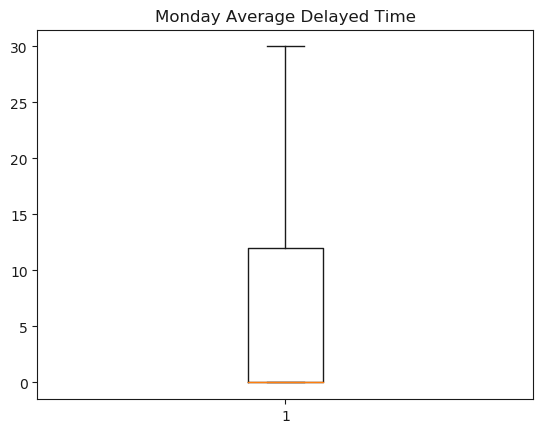

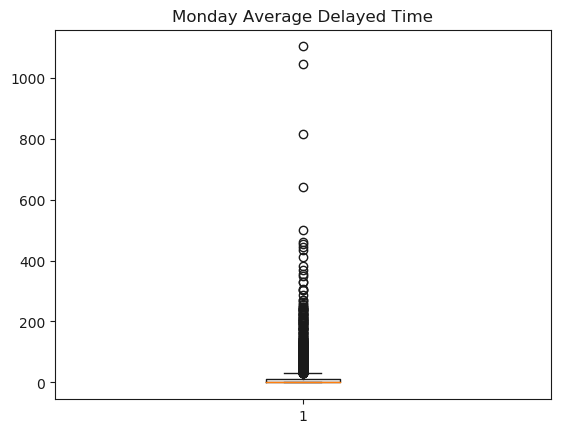

In [419]:
# Sunday
destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["DepDelayMinutes"].astype(str)
chicago_sunday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Sunday':
            if minutes_without_nan[name] != 'nan':
                chicago_sunday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Sunday  Departing to Chicago arriving late:")
print(len(chicago_sunday))
print("The Maximum is:")
maximum = max(chicago_saturday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_sunday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 7].mean())
print("The standard deviation:")
print(performance_master_aircraft["DepDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 7].std())
print("\n")



destination = performance_master_aircraft["DestCityName"]
new = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df = performance_master_aircraft["DayOfWeek"].replace(new).astype(str)
minutes_without_nan = performance_master_aircraft["ArrDelayMinutes"].astype(str)
chicago_sunday = []
start = 0 
for name in range(len(destination)):
    if destination[name] == 'Chicago, IL':
        if df[name] == 'Sunday':
            if minutes_without_nan[name] != 'nan':
                chicago_sunday.append(float(minutes_without_nan[name]))
                start += float(minutes_without_nan[name])
                

print("The Number in the Dataset For Sunday Arriving to Chicago arriving late:")
print(len(chicago_sunday))
print("The Maximum is:")
maximum = max(chicago_sunday)
print(maximum)
print("The Minimum is:")
minimum = min(chicago_sunday)
print(minimum)
print("The Sum is:")
print(start)
print("The mean")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 7].mean())
print("The standard deviation:")
print(performance_master_aircraft["ArrDelayMinutes"][performance_master_aircraft["DayOfWeek"] == 7].std())
print("\n")

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_sunday,showfliers=False)
ax2.set_title('Monday Average Delayed Time')

fig2, ax2 = plt.subplots()

ax2.boxplot(chicago_sunday)
ax2.set_title('Monday Average Delayed Time')


# Logisitc/Linear Regression


In [420]:
non = performance_master_aircraft[~performance_master_aircraft["ArrDelayMinutes"].isnull() & ~performance_master_aircraft["DepDelayMinutes"].isnull()]


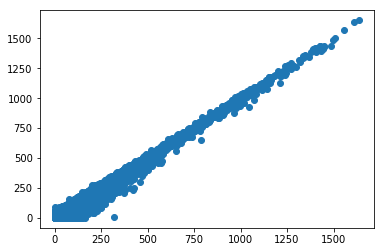

0.9742810801532755
[-0.11243462]


In [47]:
plt.scatter(performance_master_aircraft["ArrDelayMinutes"], performance_master_aircraft["DepDelayMinutes"])
plt.show()
model = LinearRegression().fit(non[["ArrDelayMinutes"]], non[["DepDelayMinutes"]])
correlation_coeff = model.coef_[0][0]
print(correlation_coeff)
intercept = model.intercept_
print(intercept)

In [143]:
non.dtypes

Tail_Number         object
DayOfWeek            int64
Year                 int64
AirTime            float64
AirTime            float64
ArrDelayMinutes    float64
DepDelayMinutes    float64
CODE                object
OriginCityName      object
DestCityName        object
ArrDel15           float64
DepDel15           float64
YEAR MFR            object
AirTime            float64
AirTime            float64
MFR                 object
MODEL               object
dtype: object

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = non[["AirTime","ArrDel15"]]
X_train, X_test, y_train, y_test = train_test_split(train.drop('ArrDel15',axis=1), 
                                                    train.drop('AirTime',axis=1), test_size=0.15, 
                                                    random_state=101)



##see if there is a correlation if it arrives or departs 
            ##assuming its continuous (age of plane , distance of flights )

In [378]:
train.ArrDel15.value_counts()

0.0    453518
1.0    102965
Name: ArrDel15, dtype: int64

In [385]:

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(predictions)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[0. 0. 1. ... 1. 0. 0.]


In [386]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


             precision    recall  f1-score   support

        0.0       0.82      0.61      0.70     68169
        1.0       0.19      0.41      0.26     15304

avg / total       0.71      0.58      0.62     83473

